<a href="https://colab.research.google.com/github/vuhpham94/nflx-data-projects-g6/blob/main/project2/notebooks/project2_g6_elnino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# drive connection
# from google.colab import drive
# drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
import os
# Find the latest version of spark 3.0  from http://www-us.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.1'
spark_version = 'spark-3.0.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.0 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/

In [3]:
 #import packages
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import StructType,StructField,StringType, DateType,IntegerType

# we are going to use this to time our queries.
import time

# Create a SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

In [4]:
# Read in data from S3 Bucket

from pyspark import SparkFiles
url = "https://raw.githubusercontent.com/vuhpham94/nflx-data-projects-g6/main/project2/resources/dataset/elnino.csv"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("elnino.csv"), sep=",", header=True)

In [5]:
df.show()

+-----------+-----+------+----+------+---------+----------+------------+-----------------+---------+---------+-----------------+
|Observation| Year| Month| Day|  Date| Latitude| Longitude| Zonal Winds| Meridional Winds| Humidity| Air Temp| Sea Surface Temp|
+-----------+-----+------+----+------+---------+----------+------------+-----------------+---------+---------+-----------------+
|          1|   80|     3|   7|800307|    -0.02|   -109.46|        -6.8|              0.7|        .|    26.14|            26.24|
|          2|   80|     3|   8|800308|    -0.02|   -109.46|        -4.9|              1.1|        .|    25.66|            25.97|
|          3|   80|     3|   9|800309|    -0.02|   -109.46|        -4.5|              2.2|        .|    25.69|            25.28|
|          4|   80|     3|  10|800310|    -0.02|   -109.46|        -3.8|              1.9|        .|    25.57|            24.31|
|          5|   80|     3|  11|800311|    -0.02|   -109.46|        -4.2|              1.5|       

In [6]:
df.summary().show()

+-------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+-------------------+-----------------+------------------+------------------+
|summary|      Observation|              Year|            Month|               Day|              Date|          Latitude|         Longitude|        Zonal Winds|   Meridional Winds|         Humidity|          Air Temp|  Sea Surface Temp|
+-------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+-------------------+-----------------+------------------+------------------+
|  count|           178080|            178080|           178080|            178080|            178080|            178080|            178080|             178080|             178080|           178080|            178080|            178080|
|   mean|          89040.5| 93.30232479784367| 6.504

In [7]:
df.printSchema()

root
 |-- Observation: string (nullable = true)
 |--  Year: string (nullable = true)
 |--  Month: string (nullable = true)
 |--  Day: string (nullable = true)
 |--  Date: string (nullable = true)
 |--  Latitude: string (nullable = true)
 |--  Longitude: string (nullable = true)
 |--  Zonal Winds: string (nullable = true)
 |--  Meridional Winds: string (nullable = true)
 |--  Humidity: string (nullable = true)
 |--  Air Temp: string (nullable = true)
 |--  Sea Surface Temp: string (nullable = true)



# New Section
<p>Cleaning data</p>

In [8]:
df =df.drop(" Date")
from pyspark.sql.types import IntegerType,BooleanType,DateType

In [9]:
df.printSchema()

root
 |-- Observation: string (nullable = true)
 |--  Year: string (nullable = true)
 |--  Month: string (nullable = true)
 |--  Day: string (nullable = true)
 |--  Latitude: string (nullable = true)
 |--  Longitude: string (nullable = true)
 |--  Zonal Winds: string (nullable = true)
 |--  Meridional Winds: string (nullable = true)
 |--  Humidity: string (nullable = true)
 |--  Air Temp: string (nullable = true)
 |--  Sea Surface Temp: string (nullable = true)



In [10]:
df.show()

+-----------+-----+------+----+---------+----------+------------+-----------------+---------+---------+-----------------+
|Observation| Year| Month| Day| Latitude| Longitude| Zonal Winds| Meridional Winds| Humidity| Air Temp| Sea Surface Temp|
+-----------+-----+------+----+---------+----------+------------+-----------------+---------+---------+-----------------+
|          1|   80|     3|   7|    -0.02|   -109.46|        -6.8|              0.7|        .|    26.14|            26.24|
|          2|   80|     3|   8|    -0.02|   -109.46|        -4.9|              1.1|        .|    25.66|            25.97|
|          3|   80|     3|   9|    -0.02|   -109.46|        -4.5|              2.2|        .|    25.69|            25.28|
|          4|   80|     3|  10|    -0.02|   -109.46|        -3.8|              1.9|        .|    25.57|            24.31|
|          5|   80|     3|  11|    -0.02|   -109.46|        -4.2|              1.5|        .|     25.3|            23.19|
|          6|   80|     

In [11]:
newColumns = ["Observation","Year","Month","Day","Latitude","Longitude","ZonalWinds","MeridionalWinds","Humidity","AirTemp","SeaSurfaceTemp"]
clean_df=df.toDF(*newColumns)

In [12]:
clean_df.printSchema()

root
 |-- Observation: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Day: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- ZonalWinds: string (nullable = true)
 |-- MeridionalWinds: string (nullable = true)
 |-- Humidity: string (nullable = true)
 |-- AirTemp: string (nullable = true)
 |-- SeaSurfaceTemp: string (nullable = true)



In [13]:
converted_df = clean_df.selectExpr("cast(year as int) Year",
    "cast(Month as int) Month",
    "cast(Day as int) Day",
    "cast(Latitude as float) Latitude",
    "cast(Longitude as float) Longitude",
    "cast(ZonalWinds as float) ZonalWinds",
    "cast(MeridionalWinds as float) MeridionalWinds",
    "cast(Humidity as float) Humidity",
    "cast(AirTemp as float) AirTemp",
    "cast(SeaSurfaceTemp as float) SeaSurfaceTemp")


In [14]:
converted_df.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Latitude: float (nullable = true)
 |-- Longitude: float (nullable = true)
 |-- ZonalWinds: float (nullable = true)
 |-- MeridionalWinds: float (nullable = true)
 |-- Humidity: float (nullable = true)
 |-- AirTemp: float (nullable = true)
 |-- SeaSurfaceTemp: float (nullable = true)



In [15]:
converted_df.show()

+----+-----+---+--------+---------+----------+---------------+--------+-------+--------------+
|Year|Month|Day|Latitude|Longitude|ZonalWinds|MeridionalWinds|Humidity|AirTemp|SeaSurfaceTemp|
+----+-----+---+--------+---------+----------+---------------+--------+-------+--------------+
|  80|    3|  7|   -0.02|  -109.46|      -6.8|            0.7|    null|  26.14|         26.24|
|  80|    3|  8|   -0.02|  -109.46|      -4.9|            1.1|    null|  25.66|         25.97|
|  80|    3|  9|   -0.02|  -109.46|      -4.5|            2.2|    null|  25.69|         25.28|
|  80|    3| 10|   -0.02|  -109.46|      -3.8|            1.9|    null|  25.57|         24.31|
|  80|    3| 11|   -0.02|  -109.46|      -4.2|            1.5|    null|   25.3|         23.19|
|  80|    3| 12|   -0.02|  -109.46|      -4.4|            0.3|    null|  24.72|         23.64|
|  80|    3| 13|   -0.02|  -109.46|      -3.2|            0.1|    null|  24.66|         24.34|
|  80|    3| 14|   -0.02|  -109.46|      -3.1|    

# Analysis Section

In [16]:
pd_df = converted_df.toPandas()
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             178080 non-null  int32  
 1   Month            178080 non-null  int32  
 2   Day              178080 non-null  int32  
 3   Latitude         178080 non-null  float32
 4   Longitude        178080 non-null  float32
 5   ZonalWinds       152917 non-null  float32
 6   MeridionalWinds  152918 non-null  float32
 7   Humidity         112319 non-null  float32
 8   AirTemp          159843 non-null  float32
 9   SeaSurfaceTemp   161073 non-null  float32
dtypes: float32(7), int32(3)
memory usage: 6.8 MB


In [17]:
zw_mean = pd_df["ZonalWinds"].mean()
mw_mean = pd_df["MeridionalWinds"].mean()
hum_mean = pd_df["Humidity"].mean()
at_mean = pd_df["AirTemp"].mean()
sst_mean = pd_df["SeaSurfaceTemp"].mean()


In [18]:
mean_filled_df=converted_df.fillna(zw_mean,subset="ZonalWinds")\
.fillna(mw_mean,subset="MeridionalWinds")\
.fillna(hum_mean,subset="Humidity")\
.fillna(at_mean,subset="AirTemp")\
.fillna(sst_mean,subset="SeaSurfaceTemp")\


In [19]:
mean_filled_df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             178080 non-null  int32  
 1   Month            178080 non-null  int32  
 2   Day              178080 non-null  int32  
 3   Latitude         178080 non-null  float32
 4   Longitude        178080 non-null  float32
 5   ZonalWinds       178080 non-null  float32
 6   MeridionalWinds  178080 non-null  float32
 7   Humidity         178080 non-null  float32
 8   AirTemp          178080 non-null  float32
 9   SeaSurfaceTemp   178080 non-null  float32
dtypes: float32(7), int32(3)
memory usage: 6.8 MB


In [20]:
use_df = mean_filled_df.toPandas()
use_df.head()

,Year,Month,Day,Latitude,Longitude,ZonalWinds,MeridionalWinds,Humidity,AirTemp,SeaSurfaceTemp
0,80,3,7,-0.02,-109.459999,-6.8,0.7,81.237007,26.139999,26.240000
1,80,3,8,-0.02,-109.459999,-4.9,1.1,81.237007,25.660000,25.969999
2,80,3,9,-0.02,-109.459999,-4.5,2.2,81.237007,25.690001,25.280001
3,80,3,10,-0.02,-109.459999,-3.8,1.9,81.237007,25.570000,24.309999
4,80,3,11,-0.02,-109.459999,-4.2,1.5,81.237007,25.299999,23.190001


In [21]:
X = use_df[['Humidity', 'ZonalWinds', 'Year', 'Month','Day', 'Latitude', 'Longitude', 'MeridionalWinds']]
y = use_df['SeaSurfaceTemp']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.05, random_state = 42)

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [-1.09240224e-01  1.49303763e-01  1.18998369e-01 -2.61848681e-02
  1.02228070e-04  3.86335004e-02  3.73580633e-03 -1.45039776e-01]
y-axis intercept:  26.368439399984403


In [26]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.3492139361120049

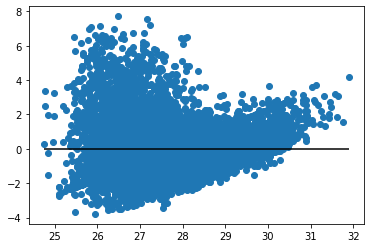

In [27]:
plt.scatter(y_pred, y_pred-y_test)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())

In [28]:
import pandas as pd
new_df = pd.DataFrame({"Predicted": y_pred, "Actual": y_test, "Error": y_pred - y_test})[["Predicted", "Actual", "Error"]]

In [29]:
new_df.head(10)

,Predicted,Actual,Error
147093,29.246040,28.389999,0.856040
120188,26.569282,23.709999,2.859283
173783,27.528561,22.930000,4.598560
17024,28.096546,29.139999,-1.043453
121252,26.135743,22.910000,3.225743
167302,28.031978,29.730000,-1.698022
157607,27.494804,29.230000,-1.735195
57988,25.728177,27.715136,-1.986959
42641,26.641695,25.719999,0.921696
128935,27.509298,28.799999,-1.290701


#Air Temperture


In [30]:
X = use_df[['Humidity', 'ZonalWinds', 'Year', 'Month','Day', 'Latitude', 'Longitude', 'MeridionalWinds', 'SeaSurfaceTemp']]
y = use_df['AirTemp']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.05, random_state = 42)

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [-3.37629315e-02 -2.95213897e-02  1.34635645e-02 -1.71262804e-02
 -1.41496555e-04 -9.78499416e-03 -7.18092036e-05 -4.42186981e-02
  7.45292232e-01]
y-axis intercept:  7.7456692748588765


In [35]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.7870050594702791

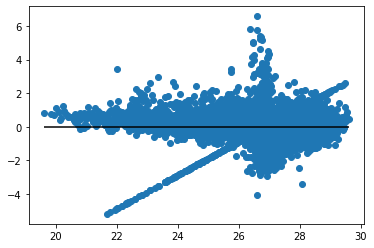

In [36]:
plt.scatter(y_pred, y_pred-y_test)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())

In [37]:
ait_temp_df = pd.DataFrame({"Predicted": y_pred, "Actual": y_test, "Error": y_pred - y_test})[["Predicted", "Actual", "Error"]]

In [38]:
ait_temp_df.head(10)

,Predicted,Actual,Error
147093,27.805857,26.887865,0.917992
120188,23.956361,23.629999,0.326362
173783,23.424174,22.219999,1.204175
17024,27.839833,27.260000,0.579833
121252,23.307915,23.020000,0.287915
167302,28.487067,28.870001,-0.382934
157607,28.119712,26.887865,1.231847
57988,26.850542,24.570000,2.280543
42641,25.301622,25.350000,-0.048378
128935,27.908751,28.010000,-0.101249
